<a href="https://colab.research.google.com/github/doanhlee04/LEARNING-/blob/main/DV_2024_Labwork6_22bi13017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Labwork6
#Working on shapefile (continued)


In [ ]:
!pip install netCDF4
!pip install basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.7/860.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 49.3 MB/s eta 0:00:00


In [ ]:
import shapefile

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.colors import Normalize



from numpy import *
from mpl_toolkits.basemap import Basemap
from netCDF4 import *


In [ ]:
#----#----#----#----#----#----#
# READ A SHAPEFILE (CONTINUE)
#----#----#----#----#----#----#



# Open the shapefile using the pyshp library
sf = shapefile.Reader("/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1.shp")

# Get the shapefile records
records = sf.records()

# Try to print the first two records
print ((records[0:2]))

# Extract province names (I guess the record 4 is the name of the provinces)
province_names = [record[4] for record in records]

# Now check if we extract the correct records :))
print (province_names)


[Record #0: ['VNM.1_1', 'VNM', 'Vietnam', 'An Giang', 'An Giang', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.AG', 'VN-44'], Record #1: ['VNM.7_1', 'VNM', 'Vietnam', 'Bà Rịa - Vũng Tàu', 'Ba Ria - Vung Tau', 'NA', 'Tỉnh', 'Province', 'NA', 'VN.BV', 'NA']]
['An Giang', 'Ba Ria - Vung Tau', 'Bac Giang', 'Bac Kan', 'Bac Lieu', 'Bac Ninh', 'Ben Tre', 'Binh Dinh', 'Binh Duong', 'Binh Phuoc', 'Binh Thuan', 'Ca Mau', 'Can Tho', 'Cao Bang', 'Da Nang', 'Dak Lak', 'Dak Nong', 'Dien Bien', 'Dong Nai', 'Dong Thap', 'Gia Lai', 'Ha Giang', 'Ha Nam', 'Ha Noi', 'Ha Tinh', 'Hai Duong', 'Hai Phong', 'Hau Giang', 'Ho Chi Minh', 'Hoa Binh', 'Hung Yen', 'Khanh Hoa', 'Kien Giang', 'Kon Tum', 'Lai Chau', 'Lam Dong', 'Lang Son', 'Lao Cai', 'Long An', 'Nam Dinh', 'Nghe An', 'Ninh Binh', 'Ninh Thuan', 'Phu Tho', 'Phu Yen', 'Quang Binh', 'Quang Nam', 'Quang Ngai', 'Quang Ninh', 'Quang Tri', 'Soc Trang', 'Son La', 'Tay Ninh', 'Thai Binh', 'Thai Nguyen', 'Thanh Hoa', 'Thua Thien Hue', 'Tien Giang', 'Tra Vinh', 'Tuyen Quan

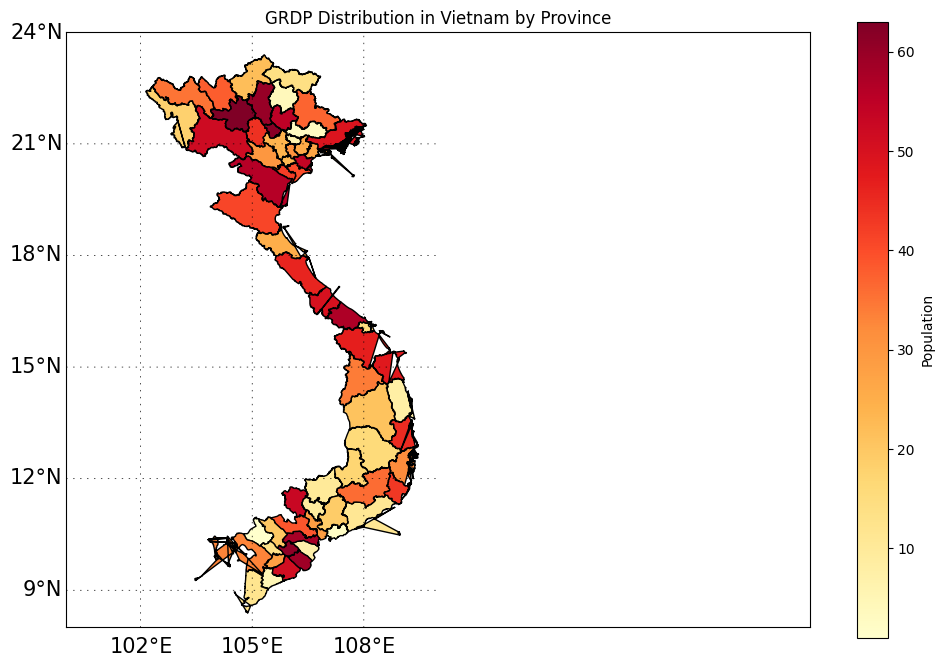

In [ ]:
#----#----#----#----#----#----#
# DRAW A COLOR-CODED SHAPEFILE
#----#----#----#----#----#----#

# Fake data about the GRDP :))
population = arange(1, 64, 1)

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

# Add basemap
map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=8,
    urcrnrlon=110,urcrnrlat=24,resolution='l',epsg=4326)


parallels = arange(-180.,180, 3) 	#lat
meridians = arange(-180.,180., 3)
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)




# Normalize the  data for coloring
norm = Normalize(vmin=min(population), vmax=max(population))

# Loop through the shapefile geometries and attributes to plot the map
for shape, pop in zip(sf.shapes(), population):
    poly = Polygon(shape.points, fill=True, edgecolor='k', facecolor=plt.cm.YlOrRd(norm(pop)))
    ax.add_patch(poly)

# Set the title and labels
ax.set_title('GRDP Distribution in Vietnam by Province')


ax.set_xlim(100, 120)
ax.set_ylim(8, 24)

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population')

# Show the map
plt.show()



# EX 1:
# The figure below has some problems. Fix it by yourself.
# Problem 1: island missing
# Problem 2: the size of the map, the parallel and meridiornal grid.
# Problem 3: some weird lines in the map, especially when we have islands.  


In [ ]:
#----#----#----#----#----#----#
# EX1: PUT YOUR CODE HERE
#----#----#----#----#----#----#

















#################################

# ANOTHER LIBRARY....

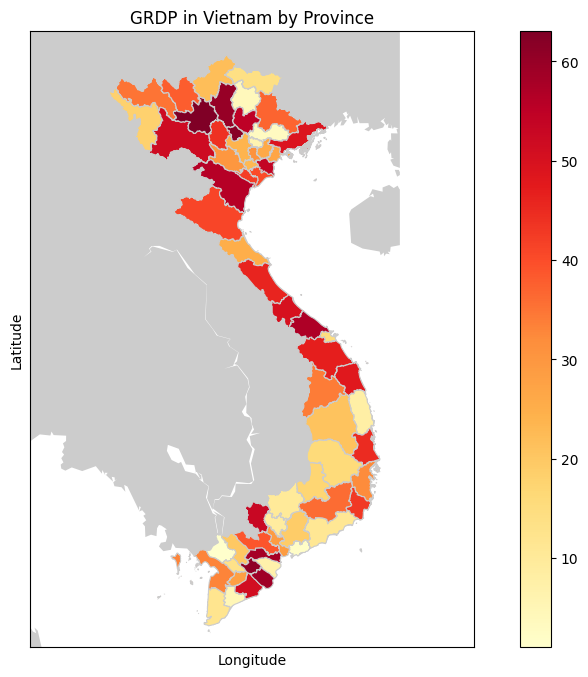

In [ ]:
#----#----#----#----#----#----#
# LET'S TRY WITH GEOPANDA
#----#----#----#----#----#----#
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a shapefile of Vietnam's provinces (replace with a real shapefile)
vietnam = gpd.read_file('/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1.shp')

# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=8,
    urcrnrlon=110,urcrnrlat=24,resolution='l',epsg=4326)

map2.fillcontinents()

# Plot the map with color-coded provinces
vietnam.plot(column=population, cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title and labels
ax.set_title('GRDP in Vietnam by Province')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


ax.set_xlim(100., 112)
ax.set_ylim(8, 24)
# Show the map
plt.show()

#This map does not have meridians (lines of longitude) and parallels (lines of latitude) yet. Add it by yourself (and add the islands also...)

#EX2
# Problem 1: This map does not have meridians (lines of longitude) and parallels (lines of latitude) yet. Add it
# Problem 2: add the islands also..
# Problem 3: Change the min and max of colorbar to min = 0, max = 70

In [ ]:
#----#----#----#----#----#----#
# EX2: PUT YOUR CODE HERE
#----#----#----#----#----#----#

















#################################

---
---

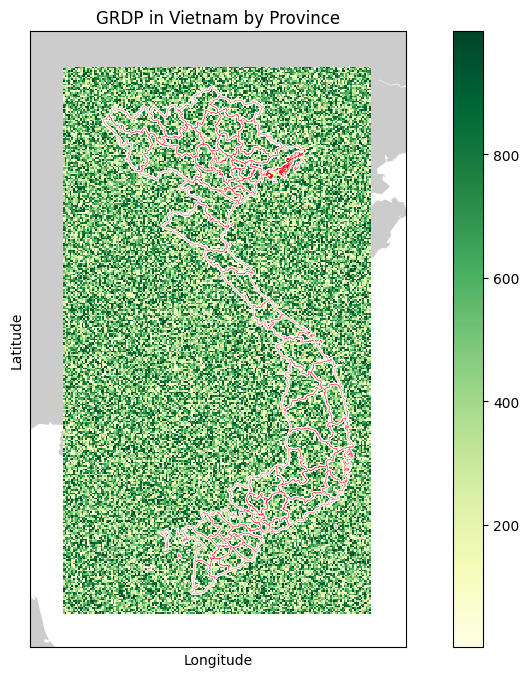

In [ ]:
#----#----#----#----#----#----#
# NOW WITH THE DATA
#----#----#----#----#----#----#

x_axis = arange(101, 110, 0.05)
y_axis = arange(8, 24, 0.05)

x_axis, y_axis = meshgrid(x_axis, y_axis)
random.seed(seed=180793)

data = random.randint(1, 1000, size = (size(x_axis,0), size(x_axis, 1)))


# Create a figure and axis
fig, ax = plt.subplots(1, figsize=(12, 8))

map2 = Basemap(projection='merc',llcrnrlon=100,llcrnrlat=7,
    urcrnrlon=111,urcrnrlat=25,resolution='l',epsg=4326)

map2.fillcontinents()
plt.pcolormesh(x_axis, y_axis, data, cmap = 'YlGn')

map2.readshapefile('/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',
	linewidth=2, color='white')

map2.readshapefile('/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1', 'gadm41_VNM_1',
	linewidth=0.2, color='r')

# Set the title and labels
ax.set_title('GRDP in Vietnam by Province')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.colorbar()

# Show the map
plt.show()


---
#EX3:
# Problem 1: calculate mean value of points inside the shapefile for each province
# Problem 2: plot it on map
---


![link text](https://i.imgur.com/iK9Jpf5.png)





.

In [ ]:
#----#----#----#----#----#----#
# EX3: PUT YOUR CODE HERE
#----#----#----#----#----#----#




# Open the shapefile using the pyshp library
sf = shapefile.Reader("/content/drive/MyDrive/USTH/Data visualization/gadm41_VNM_shp/gadm41_VNM_1.shp")

shape_data1 = sf.shapes()

print (sf.shapes()) #0 to 62
#now extract the list of points:

for i in range(0, 63):
    n_point = len(shape_data1[i].points)
    print (i, n_point)

    lon_data = zeros((n_point))
    lat_data = zeros((n_point))

    for p in shape_data1[0].points:
        lon_data[i] = p[0]
        lat_data[i] = p[0]


mpath.contains_points







#################################

Shapes: [Shape #0: POLYGON, Shape #1: POLYGON, Shape #2: POLYGON, Shape #3: POLYGON, Shape #4: POLYGON, Shape #5: POLYGON, Shape #6: POLYGON, Shape #7: POLYGON, Shape #8: POLYGON, Shape #9: POLYGON, Shape #10: POLYGON, Shape #11: POLYGON, Shape #12: POLYGON, Shape #13: POLYGON, Shape #14: POLYGON, Shape #15: POLYGON, Shape #16: POLYGON, Shape #17: POLYGON, Shape #18: POLYGON, Shape #19: POLYGON, Shape #20: POLYGON, Shape #21: POLYGON, Shape #22: POLYGON, Shape #23: POLYGON, Shape #24: POLYGON, Shape #25: POLYGON, Shape #26: POLYGON, Shape #27: POLYGON, Shape #28: POLYGON, Shape #29: POLYGON, Shape #30: POLYGON, Shape #31: POLYGON, Shape #32: POLYGON, Shape #33: POLYGON, Shape #34: POLYGON, Shape #35: POLYGON, Shape #36: POLYGON, Shape #37: POLYGON, Shape #38: POLYGON, Shape #39: POLYGON, Shape #40: POLYGON, Shape #41: POLYGON, Shape #42: POLYGON, Shape #43: POLYGON, Shape #44: POLYGON, Shape #45: POLYGON, Shape #46: POLYGON, Shape #47: POLYGON, Shape #48: POLYGON, Shape #49: POLYGON, S